In [ ]:
!! pip install transformers datasets evaluate

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting transformers',
 '  Downloading transformers-4.30.1-py3-none-any.whl (7.2 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/7.2 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.2/7.2 MB\x1b \x1b7.4 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b2.5/7.2 MB\x1b \x1b33.8 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━\x1b \x1b4.4/7.2 MB\x1b \x1b39.0 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b7.2/7.2 MB\x1b \x1b55.0 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b7.2/7.2 MB\x1b \x1b39.9 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting da

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os
#Change the current working directory to the path of Google Cloud Drive
path="/content/drive/MyDrive/ML"
os.chdir(path)
print(os.listdir(path))
os.chdir('/content')

Mounted at /content/drive/
['backbone_labeled.json', 'backbone_labeled1.json', 'qa_labeled1.json', 'backbone_labeled2.json', 'qa_labeled.json', 'ee66fe54-da44-411e-a67e-19bacd205646.json']


In [ ]:
id2label = {0: "NOT AN ANSWER", 1: "ANSWER"}
label2id = {"NOT AN ANSWER": 0, "ANSWER": 1}

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("ai-forever/sbert_large_mt_nlu_ru")

In [ ]:
def preprocess_question_data_function(data):
    return tokenizer(data['text'], truncation=True, max_length=64)

In [ ]:
import json
import pandas as pd

#json_to_check = json.load(open("/content/real_test.json"))
#for row in json_to_check:
#  if row['label'] == 1:
#    row['label'] = 0
#  if row['label'] == 3 or row['label'] == 2:
#    row['label'] = 1

#pd.read_json(json.dumps(json_to_check))

json_data = json.load(open("/content/drive/MyDrive/ML/ee66fe54-da44-411e-a67e-19bacd205646.json"))

questions = []

for row in json_data:
  questions.append({
      'text': row['question']['text'],
      'label': row['is_good_question']
  })


In [ ]:
data_to_check = pd.read_json(json.dumps(questions))
pd.set_option('display.max_colwidth', 60)
print(data_to_check.head(10))
print(len(data_to_check))

data_to_check = data_to_check.groupby("label").head(min(data_to_check["label"].value_counts()))

print(data_to_check.head(10))
print(len(data_to_check))

                                                          text  label
0  А в чем смысл этой беседы? Здесь можно задавать все вопр...      0
1  Я прост состою в МФТИшнлй беседе до сих, там у всех студ...      0
2  Не, если я буду куратором, то скорее всего я буду как на...      0
3  Добрый день! Даёт ли перечневая олимпиада по информатике...      1
4  Добрый день.не увидела в списке волонтерскую деятельност...      1
5  Здравствуйте,у меня такой вопрос ,можно ли сдать вступит...      1
6  Здравствуйте у меня такой вопрос:\nНа сайте указаны мини...      1
7  И вот не понятно: я подаю заявление на оба профиля сразу...      1
8  На сайте указано  200 баллов как проходной балл на контр...      0
9  Проходные баллы не устанавливаются. Они фиксируются прик...      0
45258
                                                          text  label
0  А в чем смысл этой беседы? Здесь можно задавать все вопр...      0
1  Я прост состою в МФТИшнлй беседе до сих, там у всех студ...      0
2  Не, если я 

In [ ]:
X_check = data_to_check['text']
Y_check = data_to_check['label']

In [ ]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_to_check, train_size=0.7, random_state=42)

train_hg_dataset = Dataset.from_pandas(train)
test_hg_dataset = Dataset.from_pandas(test)

train_hg_dataset_tokenized = train_hg_dataset.map(preprocess_question_data_function, batched=True)
test_hg_dataset_tokenized = test_hg_dataset.map(preprocess_question_data_function, batched=True)

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

In [ ]:
import numpy as np


def compute_accuracy(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)


def compute_precision(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return precision.compute(predictions=predictions, references=labels)


def compute_recall(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return recall.compute(predictions=predictions, references=labels)


def compute_f1(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return f1.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 8
num_epochs = 3
batches_per_epoch = len(train) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "ai-forever/sbert_large_mt_nlu_ru", num_labels=2, id2label=id2label, label2id=label2id
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ai-forever/sbert_large_mt_nlu_ru and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()
for i in range(len(model.bert.encoder.layer)):
  model.bert.encoder.layer[i].trainable = False
  if i == len(model.bert.encoder.layer) - 1:
    model.bert.encoder.layer[i].trainable = True
  if i == len(model.bert.encoder.layer) - 2:
    model.bert.encoder.layer[i].trainable = True
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  426908672 
                                                                 
 dropout_73 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2050      
                                                                 
Total params: 426,910,722
Trainable params: 426,910,722
Non-trainable params: 0
_________________________________________________________________
Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  426908672 
                                      

In [ ]:
train_dataset = model.prepare_tf_dataset(
    train_hg_dataset_tokenized,
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)

test_dataset = model.prepare_tf_dataset(
    test_hg_dataset_tokenized,
    shuffle=False,
    batch_size=8,
    collate_fn=data_collator,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
import tensorflow as tf

model.compile(optimizer=optimizer, metrics=["accuracy"])

In [ ]:
from transformers.keras_callbacks import KerasMetricCallback

val_accuracy_callback = KerasMetricCallback(metric_fn=compute_accuracy, eval_dataset=test_dataset)
val_precision_callback = KerasMetricCallback(metric_fn=compute_precision, eval_dataset=test_dataset)
val_recall_callback = KerasMetricCallback(metric_fn=compute_recall, eval_dataset=test_dataset)
val_f1_callback = KerasMetricCallback(metric_fn=compute_f1, eval_dataset=test_dataset)
callbacks = [val_precision_callback, val_recall_callback, val_f1_callback]

In [ ]:
checkpoint_path = 'training_1/cp.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1,
                                                 monitor='val_loss')
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
callbacks.append(cp_callback)
callbacks.append(es_callback)

In [ ]:
history = model.fit(x=train_dataset, validation_data=test_dataset, epochs=20, callbacks=callbacks)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.6140 
Epoch 1: val_loss improved from inf to 0.58254, saving model to training_1/cp.ckpt
34/34 [==============================] - 1353s 39s/step - loss: 0.6520 - accuracy: 0.6140 - val_loss: 0.5825 - val_accuracy: 0.7311 - precision: 0.7368 - recall: 0.7119 - f1: 0.7241
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 0.5437 - accuracy: 0.7610 
Epoch 2: val_loss improved from 0.58254 to 0.54690, saving model to training_1/cp.ckpt
34/34 [==============================] - 1317s 39s/step - loss: 0.5437 - accuracy: 0.7610 - val_loss: 0.5469 - val_accuracy: 0.7143 - precision: 0.6582 - recall: 0.8814 - f1: 0.7536
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.7757 
Epoch 3: val_loss improved from 0.54690 to 0.53296, saving model to training_1/cp.ckpt
34/34 [==============================] - 1262s 38s/step - loss: 0.5104 - accuracy: 0.7757 - va

In [ ]:
model.load_weights(checkpoint_path)
model.compile(optimizer=optimizer)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
pred_logits = model.predict(test_dataset)

15/15 [==============================] - 120s 7s/step


In [ ]:
print(pred_logits)

TFSequenceClassifierOutput(loss=None, logits=array([[-4.54273254e-01,  5.24627030e-01],
       [-2.49121562e-01,  6.69275343e-01],
       [-7.00961351e-01,  8.34661901e-01],
       [ 5.71530223e-01, -3.81241411e-01],
       [-3.05895597e-01,  5.42760789e-01],
       [ 1.62768841e-01,  3.97519134e-02],
       [ 9.02008772e-01, -5.73834479e-01],
       [ 4.92544957e-02,  3.09768021e-01],
       [-8.10004324e-02,  2.96606809e-01],
       [ 6.63156569e-01, -4.92027342e-01],
       [ 8.39261174e-01, -9.59536016e-01],
       [ 8.85539353e-01, -7.53733695e-01],
       [-5.12340724e-01,  6.34107172e-01],
       [-1.98320150e-01,  2.41498992e-01],
       [-1.46066591e-01,  2.93143451e-01],
       [-4.84930247e-01,  6.40508235e-01],
       [ 1.20201379e-01,  5.80219068e-02],
       [-2.53963441e-01,  5.94441354e-01],
       [ 1.83737576e-01, -2.57099390e-01],
       [ 1.01606622e-01, -9.00666192e-02],
       [ 4.02191758e-01,  4.33683656e-02],
       [-2.00414523e-01,  3.60959291e-01],
       [-

In [ ]:
labels = test_hg_dataset_tokenized['label']
predictions = np.argmax(pred_logits.logits, axis=1)
print(labels)
print(predictions)

[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 0]


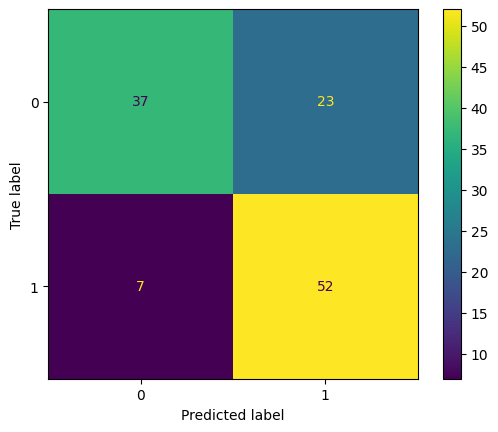

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_real = confusion_matrix(labels, predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_real, display_labels=[0, 1])
disp.plot()
plt.show()

(0.0, 0.6599026829004287)

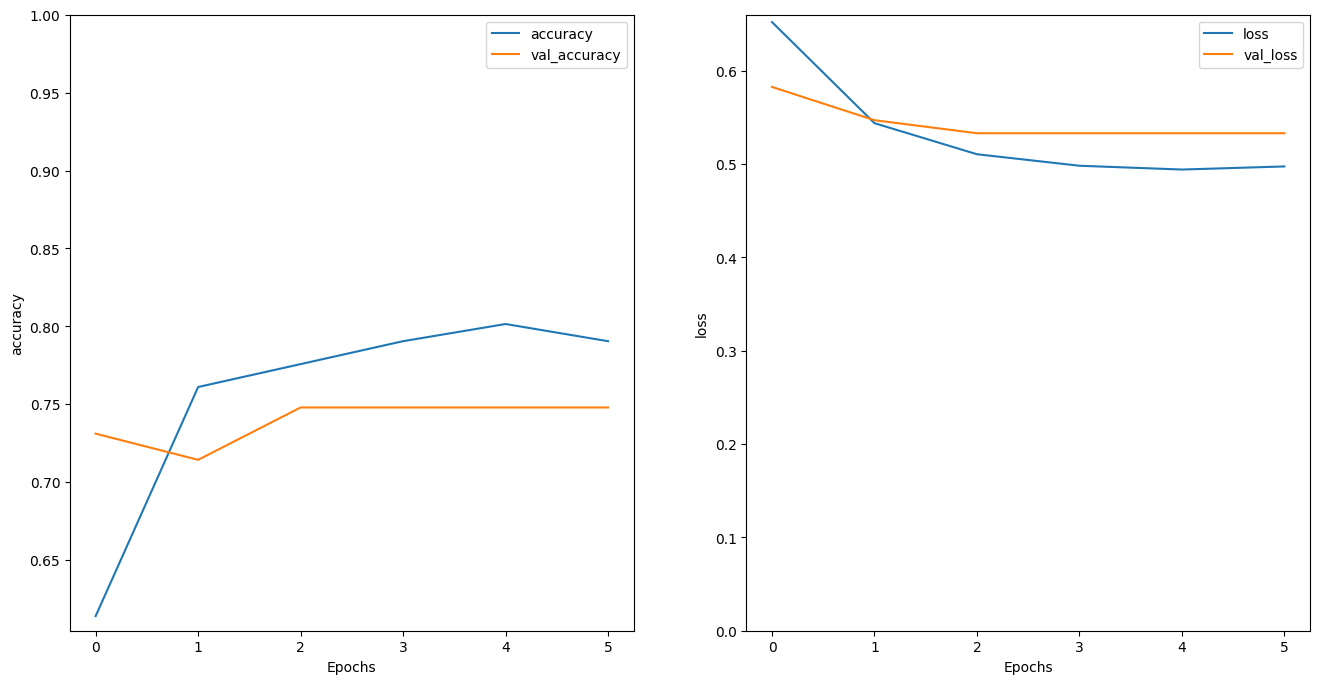

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['NO', 'GOOD']
print(classification_report(labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.84      0.62      0.71        60
        GOOD       0.69      0.88      0.78        59

    accuracy                           0.75       119
   macro avg       0.77      0.75      0.74       119
weighted avg       0.77      0.75      0.74       119



In [ ]:
model.save('BERT_Q.h5')

NotImplementedError: ignored

In [ ]:
#import shutil
#output_filename = "bert_q"
#dir_name = "BERT_Q"
#shutil.make_archive(output_filename, 'zip', dir_name)

In [ ]:
from google.colab import files
#files.download('bert_q.zip.zip')